In [1]:
from sklearn import model_selection
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score 
from collections import Counter

In [2]:
import matplotlib.pyplot as plt

In [3]:
data = datasets.load_breast_cancer()
x = data.data
y = data.target

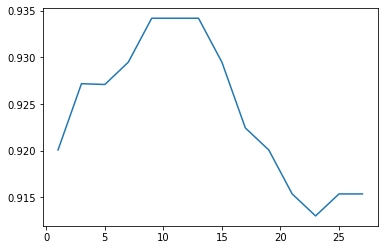

In [4]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,random_state = 0)
x_axis = []
y_axis = []

for i in range(1,29,2):
    clf = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(clf,x_train,y_train)
    x_axis.append(i)
    y_axis.append(score.mean())
#     print(i,score.mean())

plt.plot(x_axis,y_axis)
plt.show()

In [10]:
def predict_one(x_train,y_train,x_test,k):
    distances = []
    
    for i in range(len(x_train)):
        distance = ((x_train[i] -x_test)**2).mean()
        distances.append((distance,i))
    distances = sorted(distances)
    targets = []
    for i in range(k):
        targets.append(y_train[distances[i][1]])
    return Counter(targets).most_common(1)[0][0]
    

In [11]:
def predict(x_train,y_train,x_test_data):
    
    y_pred = []
    for x_test in x_test_data:
        ans = predict_one(x_train,y_train,x_test,8)
        y_pred.append(ans)
        
    return y_pred
    

In [15]:
y_ = predict(x_train,y_train,x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_)

0.9440559440559441